<a href="https://colab.research.google.com/github/julvc/python_diplo/blob/master/MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniproyecto 3: ¿Te gustaría ser *Data Scientist Senior*?
#### **Curso:** Introducción a Minería de Datos y Machine Learning

---

**¡Tienes una oferta de trabajo!**

Una empresa se enteró de tu **excelente** trabajo como *Data Scientist Junior* en **AMAZOFF**.

¡Quieren que trabajes con ellos como ***Data Scientist Senior***!

Para la entrevista de trabajo, te han pedido que utilices tus poderes de ***Machine Learning*** en sus bases de datos.

**¿Estás listo para el reto?**

# ¿Qué empresa te quiere en su equipo?

En este MP3 deberás buscar una base de datos y aplicar tus conocimientos de *Machine Learning*.

Una vez elegida la base de datos, deberás inventar una empresa ficticia que te busca para el puesto de *Data Scientist Senior*.

La empresa debe de tener sentido con los datos y lo que quieres predecir usando *Machine Learning*.

## ¿Cómo elegir la base de datos?

Puedes utilizar cualquier base de datos que esté publicada en internet de forma libre. Esta base de datos debe por lo menos cumplir con:

- Tener al menos 1000 filas después de limpiarla.
- Tener al menos 5 columnas con información relevante (no cuentan: *ids*, *index*, etc.) después de limpiarla.
- No tener consideraciones éticas graves. Ejemplo: datos privados de una empresa real.
- Debe tener al menos una columna (aparte de las 5 relevantes) para predecir (columna `label`o `target`).
- El ejercio contempla solo una base de datos. Si tus datos vienen originalmente en más de una, deberás juntarlos (ejemplo: `join`, `merge`, etc.) en la pregunta 1. Debes cargar todos los datos necesarios en la sección de **Preámbulo**.

# Define tu empresa

> **¡No olvides elegir tus datos primero!**

- **Nombre de la empresa**: Changararanguiz Agencia de Futbol
- **Descripción de la empresa**: Esta empresa fue creada con la finalidad de representar a jugadores de la Premier League y poder llevarlos a otros Torneos en el mundo. Para ello se analizan sus datos en ataque y defensa con la finalidad de predecir goles, pases, faltas, etc... y con ello poder representar y presentarlos a nuevos clubes de ser necesario.

# Pauta de Evaluación

Este MP3 está enfocado en responder preguntas de negocio relevantes para tu nueva empresa (creada por ti).

### Preguntas de Negocio

1. (10 puntos) ¿Cargaste los datos? ¡Toca limpiarlos! La empresa no ha tocado esos datos. ¿Se los puedes explicar?
2. (15 puntos) Datos limpios. Pues, es hora de un... ¡Análisis Exploratorio de Datos!
3. (10 puntos) ¡Vamos con el ML... ¿Qué? ¿Hay que preparar los datos primero?
4. (20 puntos) ¡Grupos everywhere!
5. (25 puntos) ¿Podemos predecir algo con estos datos? Demostremos nuestra experiencia.
6. (20 puntos) ¿Puedes explicar mejor tus resultados? ¡De Junior a Senior!

### Tener en consideración:

En caso de que el código esté bien, pero no se responda (usando celdas de texto) la pregunta de negocio (sección **Explicación**), **se asignará máximo la mitad de puntos** de esa pregunta.

> # ¡NO OLVIDES GUARDAR Y SUBIR EL NOTEBOOK A LA PLATAFORMA CUANDO TERMINES! FORMATO .ipynb

> # ¡NO OLVIDES SUBIR LOS DATOS ORIGINALES A LA PLATAFORMA!

# Preámbulo

In [63]:
# Agrega todas las librerias necesarias para el proyecto en su sección correspondiente

# Clustering
from sklearn.cluster import KMeans

# Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# General Data Science
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [64]:
# Esta configuración permite que los dataframes se muestren completos.
pd.set_option('display.max_columns', None)

In [65]:
# PARÁMETROS (puedes modificar esta sección)

# Traduccion de los campos obtenidos
#Rank                    : Puesto
#Player                  : Jugador
#Nation                  : Nacionalidad
#Position                : Posición
#Squad                   : Equipo
#Competition             : Competición
#Age                     : Edad
#Year_Born               : Año de Nacimiento
#Playing Time_MP         : Partidos Jugados
#Playing Time_Starts     : Partidos Iniciados
#Playing Time_Min        : Minutos Jugados
#Playing Time_90s        : Equivalente a 90 Minutos Jugados
#Performance_Gls         : Goles
#Performance_Ast         : Asistencias
#Performance_G+A         : Goles + Asistencias
#Performance_G-PK        : Goles (sin penales)
#Performance_PK          : Penales Anotados
#Performance_PKatt       : Penales Attemptados
#Performance_CrdY        : Tarjetas Amarillas
#Performance_CrdR        : Tarjetas Rojas
#Expected_xG             : Goles Esperado
#Expected_npxG           : Goles Esperado (sin penales)
#Expected_xAG            : Asistencias Esperado
#Expected_npxG+xAG       : Goles+Asistencias Esperado (sin penales)
#Progression_PrgC        : Carreras Progresivas
#Progression_PrgP        : Pases Progresivos
#Progression_PrgR        : Dribles Progresivos
#Per 90 Minutes_Gls      : Goles por 90 Minutos
#Per 90 Minutes_Ast      : Asistencias por 90 Minutos
#Per 90 Minutes_G+A      : Goles + Asistencias por 90 Minutos
#Per 90 Minutes_G-PK     : Goles (sin penales) por 90 Minutos
#Per 90 Minutes_G+A-PK   : Goles + Asistencias (sin penales) por 90 Minutos
#Per 90 Minutes_xG       : Goles por 90 Minutos
#Per 90 Minutes_xAG      : Asistencias por 90 Minutos
#Per 90 Minutes_xG+xAG   : Goles+Asistencias por 90 Minutos
#Per 90 Minutes_npxG     : Goles (sin penales) por 90 Minutos
#Per 90 Minutes_npxG+xAG : Goles+Asistencias (sin penales) por 90 Minutos

# Leer el archivo CSV sin encabezado
df = pd.read_csv('jugadoresUEFA.csv', header=None)

# Definir la fila del encabezado que se repite
repeated_header = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls',
                   'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
                   'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG']

# Filtrar las filas que no son iguales a la fila repetida
df_cleaned = df[~df.apply(lambda row: row.tolist() == repeated_header, axis=1)]

# Asignar la primera fila como encabezado
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned[1:]

# Verificar el resultado
print(df_cleaned.head())




0 Rank             Player   Nation Position           Squad  \
1    1         Max Aarons  eng ENG       DF     Bournemouth   
2    2   Brenden Aaronson   us USA    MF,FW    Union Berlin   
3    3    Paxten Aaronson   us USA       MF  Eint Frankfurt   
4    4  Keyliane Abdallah   fr FRA       FW       Marseille   
5    5   Yunis Abdelhamid   ma MAR       DF           Reims   

0         Competition Age Year_Born Playing Time_MP Playing Time_Starts  \
1  eng Premier League  23      2000              20                  13   
2       de Bundesliga  22      2000              30                  14   
3       de Bundesliga  19      2003               7                   1   
4          fr Ligue 1  17      2006               1                   0   
5          fr Ligue 1  35      1987              31                  31   

0 Playing Time_Min Playing Time_90s Performance_Gls Performance_Ast  \
1             1237             13.7               0               1   
2             1267          

In [66]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 2958
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     2844 non-null   object
 1   Player                   2844 non-null   object
 2   Nation                   2844 non-null   object
 3   Position                 2844 non-null   object
 4   Squad                    2844 non-null   object
 5   Competition              2844 non-null   object
 6   Age                      2844 non-null   object
 7   Year_Born                2844 non-null   object
 8   Playing Time_MP          2844 non-null   object
 9   Playing Time_Starts      2844 non-null   object
 10  Playing Time_Min         2844 non-null   object
 11  Playing Time_90s         2844 non-null   object
 12  Performance_Gls          2844 non-null   object
 13  Performance_Ast          2844 non-null   object
 14  Performance_G+A          2844 non-null   obje

In [67]:
# Esta celda se encarga de cargar los datos. ¿La necesitas modificar? ¡Adelante!

df = df_cleaned
print(f'{df.shape[0]} rows x {df.shape[1]} columns')
df.head(5)

2844 rows x 37 columns


,Rank,Player,Nation,Position,Squad,Competition,Age,Year_Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG
1,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,13,1237,13.7,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.9,22,43,26,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
2,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,1267,14.1,2,2,4,2,0,0,3,1,2.0,2.0,1.9,3.8,37,56,91,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
3,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2,5,7,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
4,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,0,4,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,31,31,2781,30.9,4,0,4,3,1,1,5,0,3.4,2.6,0.3,2.9,36,137,9,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [ ]:
# ¿Necesitas más celdas antes de empezar a trabajar? ¡Agrega todas las que necesites!
# No olvides que en la pregunta 1 es donde debes hacer la limpieza de datos.

# [ AGREGA AQUÍ TU CÓDIGO ]

# 1. ¿Cargaste los datos? ¡Toca limpiarlos! La empresa no ha tocado esos datos. ¿Se los puedes explicar?

⁉️ **Consideración:** Asegúrate que no haya datos faltantes, que estén en el formato o tipo de dato correctos, que no haya inconsistencias, que puedas estar seguro que los datos están listos para ser usados. No olvides explicar todas tus decisiones.

ℹ️ **HINT 1:** ¿Necesitas crear nuevas columnas? ¿Tienes datos con muchas categorías? ¿Sobran columnas?

ℹ️ **HINT 2:** Recuerda que esta sección debe cumplir con los criterios para elegir la base de datos.

ℹ️ **HINT 3:** Toma de inspiración la pregunta 2 del MP1.

---

✅ **Explicación:**

*   Es una base datos con todas las estadisticas de los juegadores UEFA del ultimo tiempo, con ella se pueden detectar jugadores con bajo, medio o superior rendimiento que quizas buscan nuevos equipos y nuestra empresa pueda representarlos. De forma inicial si bien muestra datos y valores como numeros, al traspasarlos para trabajar solo son objetos y/o string, toca limpiarlos y modificalos:

  *   Lo primero que hice fue traspasar todas las columnas que son numericas a su tipo correspondiente, ya que al cargar la base, volvio todos los campos objects
  *   Primero pase todas las columnas que deben ser FLOAT a una   variable y posterior el cambio de tipo columna
  *   Primero pase todas las columnas que deben ser INT a una variable  y posterior el cambio de tipo columna
  *   Ya con las columnas pasadas a numeros, comence a crear nuevas   columnas a partir de eso por ejemplo si un jugador hace o no goles,   su performance en cada partido, si juega o no y asi sucesivamente.  Todos los nombres seran usados en ingles para mantener el idioma de  la base datos.
  *   Se crearon ademas columnas con categorias con la misma finalidad  de lo anterior para usarlas en ML.




In [68]:
# Traspasar datos objects a numeros de tipo float
columnas_a_convertir_float = ['Playing Time_90s','Expected_xG', 'Expected_npxG','Expected_xAG','Expected_npxG+xAG',
                              'Per 90 Minutes_Gls','Per 90 Minutes_Ast', 'Per 90 Minutes_G+A','Per 90 Minutes_G-PK',
                              'Per 90 Minutes_G+A-PK','Per 90 Minutes_xG', 'Per 90 Minutes_xAG','Per 90 Minutes_xG+xAG',
                              'Per 90 Minutes_npxG','Per 90 Minutes_npxG+xAG']
df[columnas_a_convertir_float] = df[columnas_a_convertir_float].astype(float)

# Traspasar datos objects a numeros de tipo int
columnas_a_convertir_int = ['Age','Year_Born','Playing Time_MP','Playing Time_Starts','Playing Time_Min','Performance_Gls','Performance_Ast',
                        'Performance_G+A','Performance_G-PK','Performance_PK','Performance_PKatt','Performance_CrdY','Performance_CrdR',
                        'Progression_PrgC','Progression_PrgP','Progression_PrgR']
df[columnas_a_convertir_int] = df[columnas_a_convertir_int].astype(int)


# Crear una nueva característica: ratio de conversión de goles
df['Per 90 Minutes_Gls'] = df['Performance_Gls'] / df['Playing Time_90s']
df['Assist_Rate'] = df['Performance_Ast'] / df['Expected_xAG']

# Crear una característica que indique si un jugador es titular habitual
df['Pct_Min_Starting_Player'] = df['Playing Time_Starts'] / df['Playing Time_MP'] >= 0.50  # Ajusta el umbral según tu criterio
df['Can_Create_Offensive_Opp'] = df['Per 90 Minutes_xG'] + df['Per 90 Minutes_xAG'] >= 1.0  # Ajusta el umbral según tu criterio

# Jugadores Ofensivos
df['Goals_per_Min'] = df['Performance_Gls'] / df['Playing Time_Min']
df['Asists_per_Min'] = df['Performance_Ast'] / df['Playing Time_Min']
df['G+A_per_Min'] = df['Performance_G+A'] / df['Playing Time_Min']
df['Goals_Clasification'] = pd.cut(df['Performance_Gls'],
                                   bins=[-1, df['Performance_Gls'].quantile(0.33),
                                         df['Performance_Gls'].quantile(0.66), df['Performance_Gls'].max()],
                                   labels=['low', 'normal', 'top'])

df['Passes_Clasification'] = pd.cut(df['Progression_PrgP'],
                                   bins=[-1, df['Progression_PrgP'].quantile(0.33),
                                         df['Progression_PrgP'].quantile(0.66), df['Progression_PrgP'].max()],
                                   labels=['low', 'normal', 'top'])

# Jugadores que usualmente tienen problemas con faltas
df['YellowCard_per_Min'] = df['Performance_CrdY'] / df['Playing Time_Min']
df['RedCard_per_Min'] = df['Performance_CrdR'] / df['Playing Time_Min']
df['Total_Cards'] = df['Performance_CrdY'] + df['Performance_CrdR']
df['Dirty_Player'] = pd.cut(df['Total_Cards'],
                                      bins=[-1, df['Total_Cards'].quantile(0.33),
                                            df['Total_Cards'].quantile(0.66), df['Total_Cards'].max()],
                                      labels=['low', 'medium', 'high'])

# Contribucion progresiva
df['Progressive_Contributions'] = df['Progression_PrgC'] + df['Progression_PrgP'] + df['Progression_PrgR']

# Clasificados por edad
# Crear una banda de edad
bins = [16, 25, 30, 35, 40]
labels = ['Young', 'Young Adult', 'Adult', 'Veteran']
df['Age_range'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Nuevas columnas booleanas
df['Makes_Goals'] = df['Performance_Gls'].apply(lambda x: 1 if x > 0 else 0)
df['Makes_ASsists'] = df['Performance_Ast'].apply(lambda x: 1 if x > 0 else 0)
df['Sanctioned_Regularly'] = df.apply(lambda x: 1 if (x['Performance_CrdR'] > 0 or x['Performance_CrdY'] > 0) else 0, axis=1)
df['Played_Regularly'] = df.apply(lambda x: 1 if (x['Playing Time_MP'] > 0 or x['Playing Time_Starts'] > 0 or x['Playing Time_Min'] > 0) else 0, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 2958
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rank                       2844 non-null   object  
 1   Player                     2844 non-null   object  
 2   Nation                     2844 non-null   object  
 3   Position                   2844 non-null   object  
 4   Squad                      2844 non-null   object  
 5   Competition                2844 non-null   object  
 6   Age                        2844 non-null   int64   
 7   Year_Born                  2844 non-null   int64   
 8   Playing Time_MP            2844 non-null   int64   
 9   Playing Time_Starts        2844 non-null   int64   
 10  Playing Time_Min           2844 non-null   int64   
 11  Playing Time_90s           2844 non-null   float64 
 12  Performance_Gls            2844 non-null   int64   
 13  Performance_Ast            2844 non-nu

In [69]:
# Separar la nacionalidad de cada jugador
df[['Nation_Code', 'Nation_Short_Name']] = df['Nation'].str.split(' ', expand=True)

# Generar el nombre completo del pais
!pip install countryinfo
from countryinfo import CountryInfo
df['Nation_Short_Name'] = df['Nation_Short_Name'].str.lstrip()
df['Nation_Short_Name'] = df['Nation_Short_Name'].str.rstrip()
df['Nation_Short_Name'] = df['Nation_Short_Name'].str.replace(r'^\s+|\s+$', '', regex=True)

codigo_a_pais = {
'ENG': 'England', 'SCO': 'Scotland','WAL': 'Wales','IRL': 'Ireland','NIR': 'Northern Ireland','DEN': 'Denmark',
'SUI': 'Switzerland','GER': 'Germany','FRA': 'France','ITA': 'Italy','ESP': 'Spain','POR': 'Portugal','BEL': 'Belgium',
'NED': 'Netherlands','CZE': 'Czech Republic','POL': 'Poland','HUN': 'Hungary','RUS': 'Russia','UKR': 'Ukraine',
'BUL': 'Bulgaria','ROU': 'Romania','TUR': 'Turkey','MEX': 'Mexico','USA': 'United States','CAN': 'Canada',
'BRA': 'Brazil','ARG': 'Argentina','COL': 'Colombia','CHI': 'Chile','PER': 'Peru','URU': 'Uruguay',
'VEN': 'Venezuela','AUS': 'Australia','NZL': 'New Zealand', 'JPN': 'Japan','KOR': 'South Korea','CHN': 'China',
'IND': 'India','KSA': 'Saudi Arabia', 'IRN': 'Iran','UAE': 'United Arab Emirates','EGY': 'Egypt','TUN': 'Tunisia',
'ALG': 'Algeria','MAR': 'Morocco','GHA': 'Ghana','NGA': 'Nigeria','CIV': 'Ivory Coast','SEN': 'Senegal','ZAF': 'South Africa',
'KEN': 'Kenya','ZWE': 'Zimbabwe',
}

def get_fullname_country(code):
    return codigo_a_pais.get(code, None)

df['FullName_Country'] = df['Nation_Short_Name'].apply(get_fullname_country)

# Separar las diferentes posiciones de cada jugador(Existen algunos con mas de una posicion)
df[['Primary_Position', 'Second_Position']] = df['Position'].str.split(',', expand=True)
df['Second_Position'] = df['Second_Position'].fillna('Unknown')

# Separar el pais y el nombre de cada competicion
df['Competition_Name'] = df['Competition'].str.split(' ', n=1).str[1]

# Eliminar espacios a la izquierda a la derecha
df['Player'] = df['Player'].str.lstrip()
df['Player'] = df['Player'].str.rstrip()
df['Player'] = df['Player'].str.replace(r'^\s+|\s+$', '', regex=True)

df.head(5)


,Rank,Player,Nation,Position,Squad,Competition,Age,Year_Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Assist_Rate,Pct_Min_Starting_Player,Can_Create_Offensive_Opp,Goals_per_Min,Asists_per_Min,G+A_per_Min,Goals_Clasification,Passes_Clasification,YellowCard_per_Min,RedCard_per_Min,Total_Cards,Dirty_Player,Progressive_Contributions,Age_range,Makes_Goals,Makes_ASsists,Sanctioned_Regularly,Played_Regularly,Nation_Code,Nation_Short_Name,FullName_Country,Primary_Position,Second_Position,Competition_Name
1,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,13,1237,13.7,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.9,22,43,26,0.000000,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,1.250000,True,False,0.000000,0.000808,0.000808,low,normal,0.000808,0.000000,1,low,91,Young,0,1,1,1,eng,ENG,England,DF,Unknown,Premier League
2,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,1267,14.1,2,2,4,2,0,0,3,1,2.0,2.0,1.9,3.8,37,56,91,0.141844,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,1.052632,False,False,0.001579,0.001579,0.003157,top,top,0.002368,0.000789,4,high,184,Young,1,1,1,1,us,USA,United States,MF,FW,Bundesliga
3,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2,5,7,0.000000,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,10.000000,False,False,0.000000,0.009901,0.009901,low,low,0.000000,0.000000,0,low,14,Young,0,1,0,1,us,USA,United States,MF,Unknown,Bundesliga
4,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,0,4,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,False,False,0.000000,0.000000,0.000000,low,low,0.000000,0.000000,0,low,0,Young,0,0,0,1,fr,FRA,France,FW,Unknown,Ligue 1
5,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,31,31,2781,30.9,4,0,4,3,1,1,5,0,3.4,2.6,0.3,2.9,36,137,9,0.129450,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,0.000000,True,False,0.001438,0.000000,0.001438,top,top,0.001798,0.000000,5,high,182,Adult,1,0,1,1,ma,MAR,Morocco,DF,Unknown,Ligue 1


In [71]:
df.info()
print(df.isnull().sum())
# Rellenar campos con valores si posee None o NaN por ejemplo
df.fillna({
    'Per 90 Minutes_Gls': df['Per 90 Minutes_Gls'].mean(),
    'Assist_Rate': df['Assist_Rate'].mean(),
    'Age_range': df['Age_range'].mode()[0],
    'FullName_Country': 'Unknown'
}, inplace=True)
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 2958
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rank                       2844 non-null   object  
 1   Player                     2844 non-null   object  
 2   Nation                     2844 non-null   object  
 3   Position                   2844 non-null   object  
 4   Squad                      2844 non-null   object  
 5   Competition                2844 non-null   object  
 6   Age                        2844 non-null   int64   
 7   Year_Born                  2844 non-null   int64   
 8   Playing Time_MP            2844 non-null   int64   
 9   Playing Time_Starts        2844 non-null   int64   
 10  Playing Time_Min           2844 non-null   int64   
 11  Playing Time_90s           2844 non-null   float64 
 12  Performance_Gls            2844 non-null   int64   
 13  Performance_Ast            2844 non-nu

In [73]:
# Limpieza de datos duplicados
df.drop_duplicates(inplace=True)
df.describe()

,Age,Year_Born,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,Assist_Rate,Goals_per_Min,Asists_per_Min,G+A_per_Min,YellowCard_per_Min,RedCard_per_Min,Total_Cards,Progressive_Contributions,Makes_Goals,Makes_ASsists,Sanctioned_Regularly,Played_Regularly
count,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.00000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.0
mean,25.068214,1997.592475,19.017229,13.550633,1216.446203,13.517264,1.725035,1.225387,2.950422,1.569972,0.155063,0.193741,2.662096,0.120253,1.750703,1.596519,1.234564,2.830134,21.534810,46.999648,46.538326,0.124371,0.093558,0.215520,0.114462,0.207876,0.132644,0.099248,0.231994,0.124459,0.223868,inf,0.001356,0.001039,0.002395,0.002823,0.000163,2.782349,115.072785,0.486990,0.466245,0.738045,1.0
std,4.588856,4.594369,11.498278,11.246287,961.059528,10.679215,3.206734,1.967063,4.619615,2.843130,0.716770,0.812808,2.726627,0.355289,2.898396,2.519858,1.710584,3.819695,26.897962,51.830431,60.438336,0.278410,0.366719,0.473516,0.278126,0.468512,0.207986,0.237067,0.334931,0.198639,0.327935,NaN,0.003160,0.004074,0.005261,0.009087,0.002410,2.839367,119.620454,0.499919,0.498947,0.439776,0.0
min,15.000000,1982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,22.000000,1994.000000,8.000000,3.000000,300.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.275000,2.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.050000,0.020000,0.050000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.0
50%,25.000000,1998.000000,20.000000,12.000000,1115.000000,12.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.700000,0.700000,0.600000,1.400000,12.000000,31.000000,21.500000,0.030960,0.000000,0.090000,0.000000,0.090000,0.060000,0.060000,0.145000,0.060000,0.140000,1.06383,0.000000,0.000000,0.001047,0.001741,0.000000,2.000000,81.000000,0.000000,0.000000,1.000000,1.0
75%,28.000000,2001.000000,29.000000,23.000000,1992.250000,22.100000,2.000000,2.000000,4.000000,2.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.900000,1.700000,3.700000,30.000000,73.000000,71.000000,0.154530,0.120000,0.290000,0.140000,0.280000,0.180000,0.130000,0.330000,0.170000,0.310000,4.00000,0.001719,0.001330,0.003261,0.003230,0.000000,4.000000,175.000000,1.000000,1.000000,1.000000,1.0
max,40.000000,2008.000000,38.000000,38.000000,3420.000000,38.000000,36.000000,14.000000,44.000000,31.000000,10.000000,10.000000,17.000000,3.000000,30.600000,26.700000,11.800000,33.000000,218.000000,392.000000,508.000000,5.000000,11.250000,11.250000,6.000000,11.250000,4.550000,6.850000,6.850000,4.550000,6.850000,inf,0.066667,0.125000,0.125000,0.333333,0.125000,17.000000,789.000000,1.000000,1.00000

# 2. Datos limpios. Pues, es hora de un... ¡Análisis Exploratorio de Datos!

⁉️ **Consideración:** ¡Es hora del EDA! Es importante entender muy bien que **información** contienen tus datos. Para esto, considerando las necesidades de tu empresa, plantearás 5 preguntas interesantes para ella que se puedan responder al analizar tus datos.

ℹ️ **HINT 1 :** Busca preguntas relevantes y no triviales. Utiliza gráficos, estadísticas, lo que se ocurra para explotar la información de los datos.

ℹ️ **HINT 2:** Inspírate en las preguntas 3 y 4 del MP1.

---

✅ **Explicación:**

- **Pregunta 1: ¿Podrias entregar un resumen de lo que has realizado?**

    * Se hace un resumen con todas las columnas generadas incluyendo tambien un resumen con todos los valores estandares, ademas del nombre de la columna, si tiene valores nulos o no y su tipo. De igual manera se imprimen todas las columnas que posean valores nulos de haber.

- **Pregunta 2: ¿Para que me sirve observar estos campos claves?**

    * Ayuda a la obtencion de patrones. Evitar sesgos y evaluar a la vez de forma normal ya que todo se representa y se ve limpio.
    * Un ejemplo es la cantidad de jugadores que no han convertido goles o bien el rango de edad actual para posibles contrataciones y esten mas lejos de un posible retiro.

- **Pregunta 3: ¿Porque realizar un mapa de calor con estos datos?**

    * Porque me permite ver rapidamenta las relaciones entre variables y descrubir patrones ocultos. Se puede ademas visualizar posibles valores atipicos.

- **Pregunta 4: ¿Porque usar nuevamente graficos si ya fueron utilizados en la pregunta 2?**

    * Hay una diferencia frente a la anterior pregunta, ya que este analisis se basa en el tiempo de juego de un partido a los 90, lo cual permite determinar o bien usar estos datos para predecir goles, faltas en futuros encuentros.

- **Pregunta 5: ¿Porque una clasificacion por rangos de diversos features?**

    * la idea es poder demostrar visualmente de igual manera "cuotas" de jugadores y su edad para enforcarse en representarlos y ofrecerlos de mejor manera de acuerdo a este analisis preliminar

In [43]:
# PREGUNTA 1: [ PREGUNTA ACÁ ]

# 1. Descripción General del DataFrame
print("Información general del DataFrame")
print(df.info())
print("\nResumen estadístico:")
print(df.describe())

# Detectar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 2958
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rank                       2844 non-null   object  
 1   Player                     2844 non-null   object  
 2   Nation                     2844 non-null   object  
 3   Position                   2844 non-null   object  
 4   Squad                      2844 non-null   object  
 5   Competition                2844 non-null   object  
 6   Age                        2844 non-null   int64   
 7   Year_Born                  2844 non-null   int64   
 8   Playing Time_MP            2844 non-null   int64   
 9   Playing Time_Starts        2844 non-null   int64   
 10  Playing Time_Min           2844 non-null   int64   
 11  Playing Time_90s           2844 non-null   float64 
 12  Performance_Gls            2844 non-null   int64   
 13  Perf

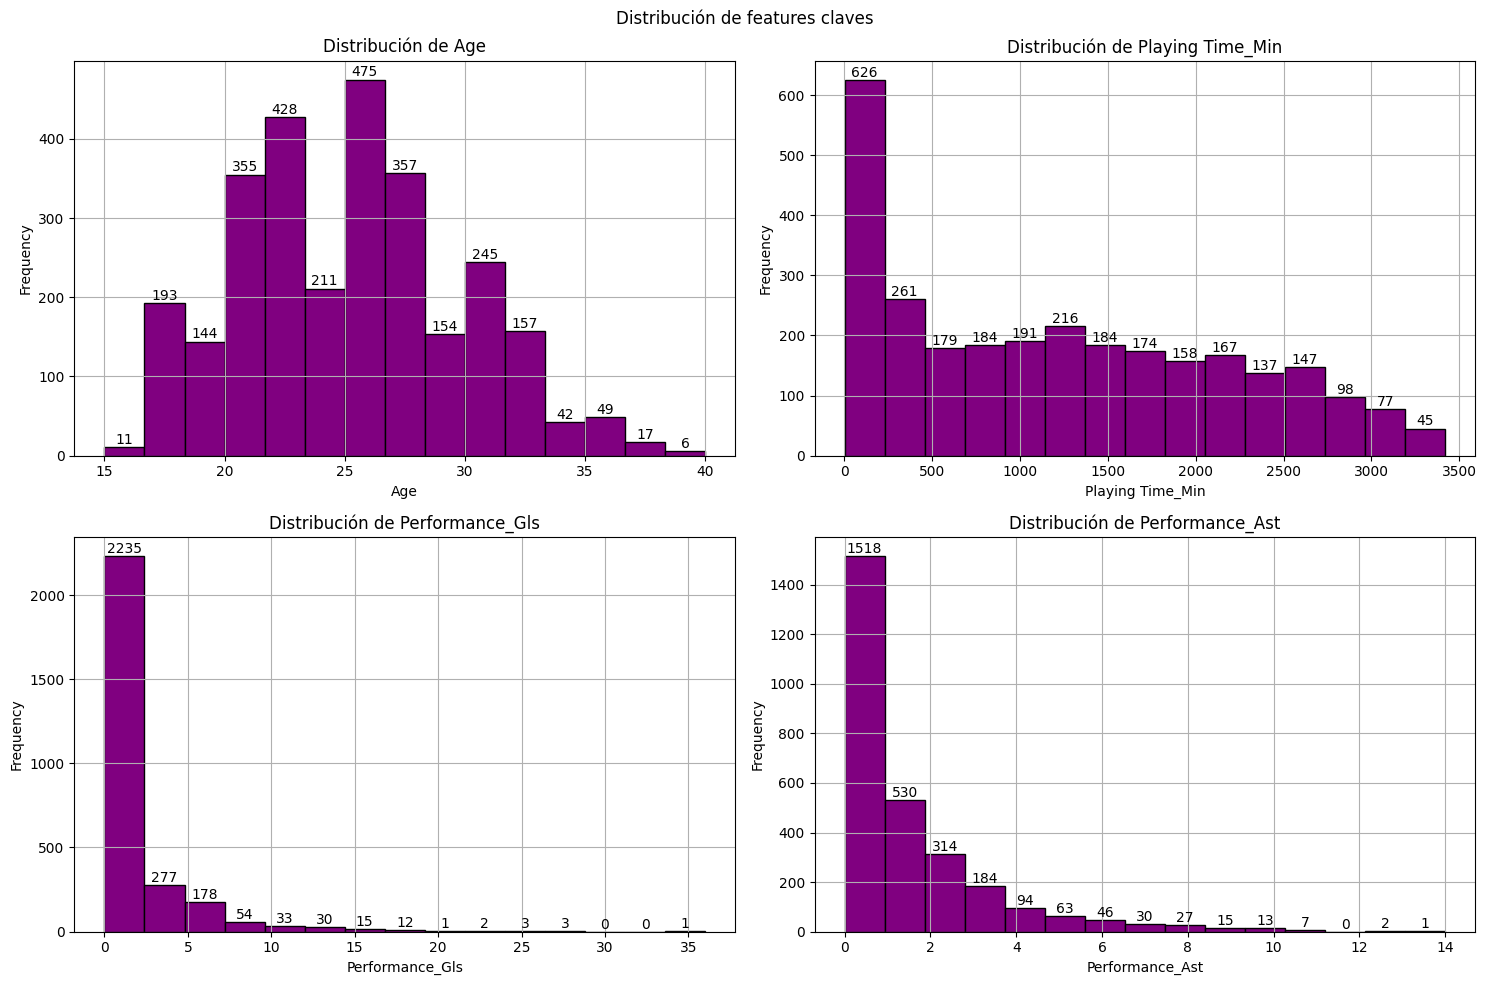

In [79]:
# PREGUNTA 2: Como observar la distribución de edad, minutos jugados, goles, y asistencias
num_cols = ['Age', 'Playing Time_Min', 'Performance_Gls', 'Performance_Ast']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].hist(bins=15, ax=ax, color='purple', edgecolor='black')
    ax.set_title(f"Distribución de {col}")

    # Agregar los valores encima de cada barra
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = height + 0.2  # Ajustar la posición vertical
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='bottom', fontsize=10)

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.suptitle("Distribución de features claves")
plt.tight_layout()
plt.show()

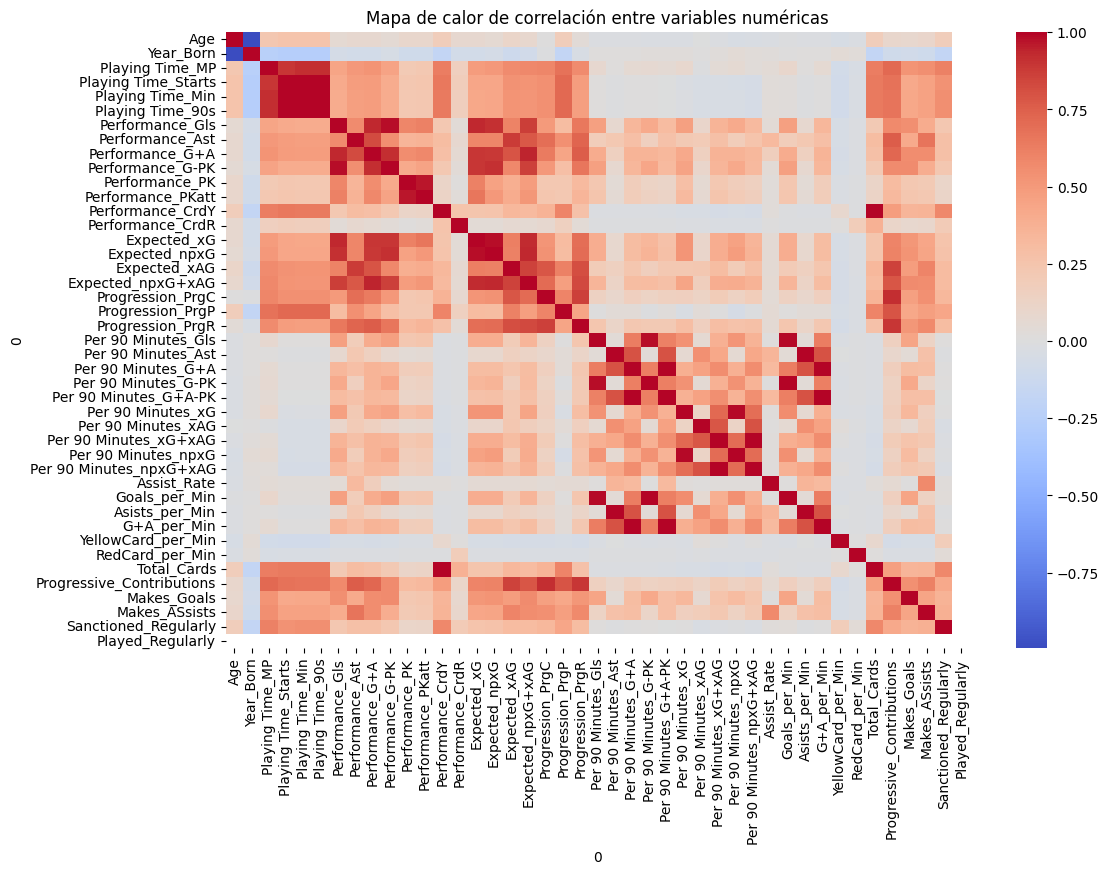

In [46]:
# PREGUNTA 3: Generar mapa de calor de correlación con las columnas numéricas solamente

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.show()

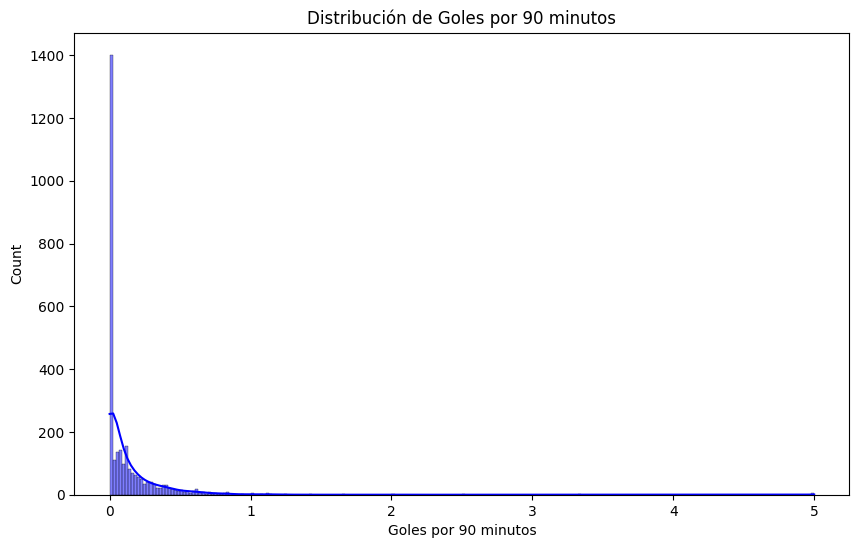

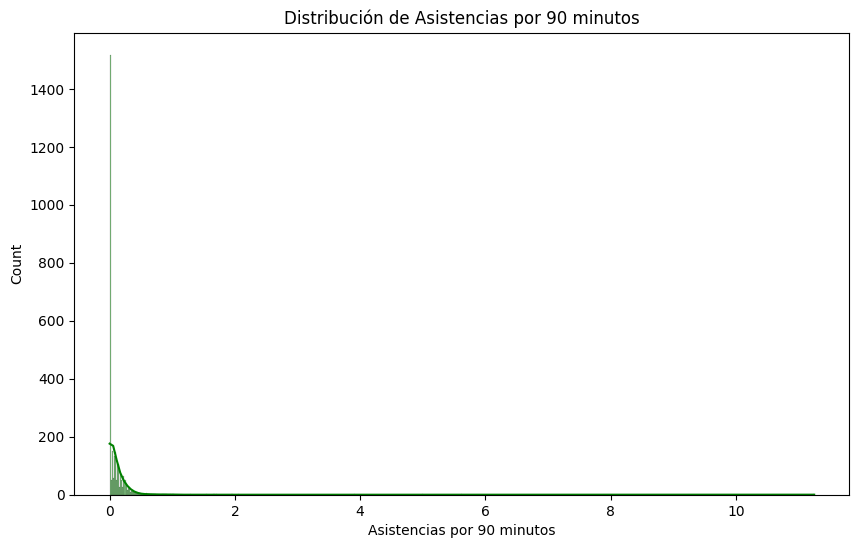

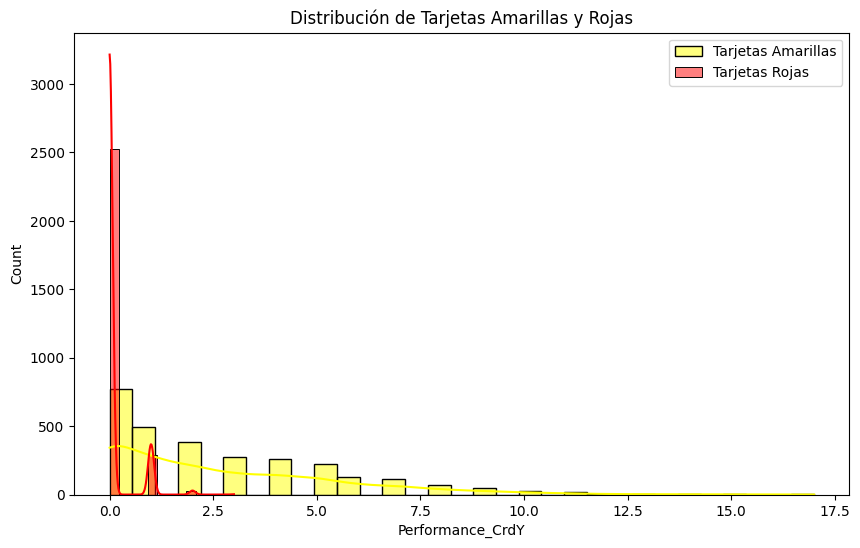

In [80]:
# PREGUNTA 4: Gráficos específicos de features claves

# Distribución de goles por 90 minutos
plt.figure(figsize=(10, 6))
sns.histplot(df['Per 90 Minutes_Gls'], kde=True, color="blue")
plt.title("Distribución de Goles por 90 minutos")
plt.xlabel("Goles por 90 minutos")
plt.show()

# Distribución de asistencias por 90 minutos
plt.figure(figsize=(10, 6))
sns.histplot(df['Per 90 Minutes_Ast'], kde=True, color="green")
plt.title("Distribución de Asistencias por 90 minutos")
plt.xlabel("Asistencias por 90 minutos")
plt.show()

# Tarjetas amarillas y rojas
plt.figure(figsize=(10, 6))
sns.histplot(df['Performance_CrdY'], kde=True, color="yellow", label="Tarjetas Amarillas")
sns.histplot(df['Performance_CrdR'], kde=True, color="red", label="Tarjetas Rojas")
plt.title("Distribución de Tarjetas Amarillas y Rojas")
plt.legend()
plt.show()

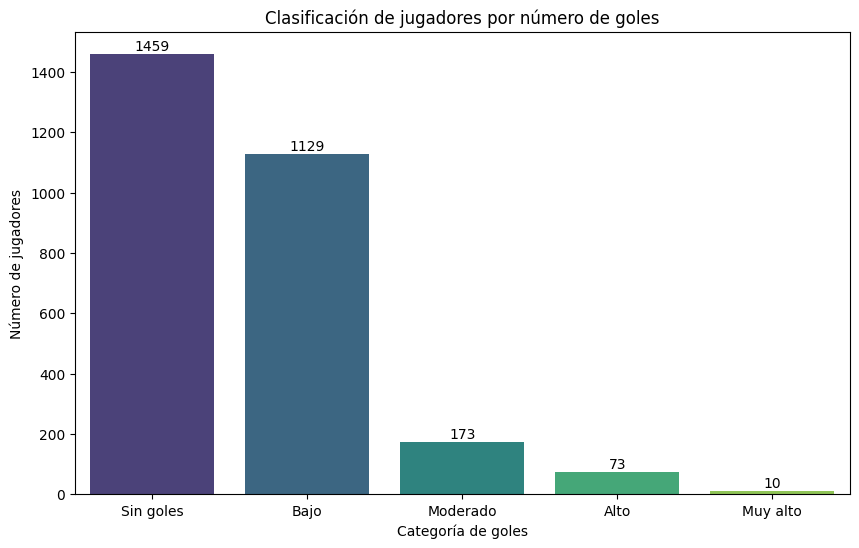

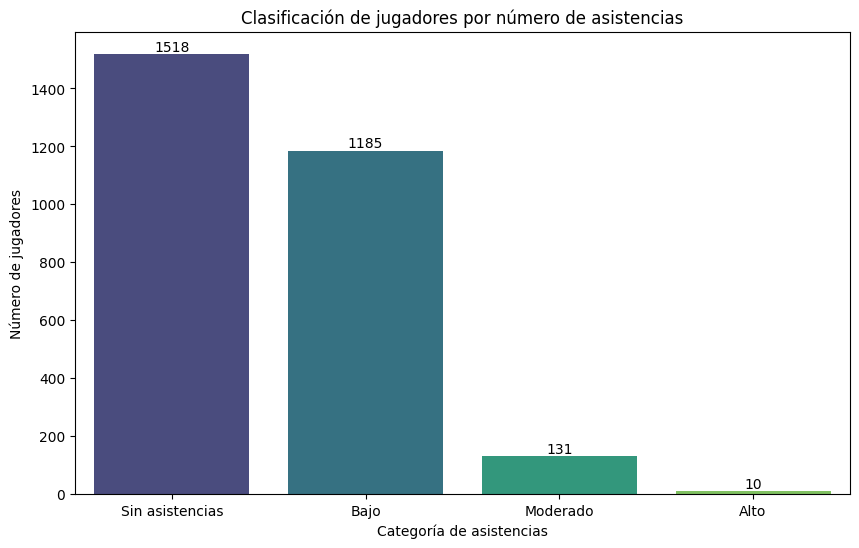

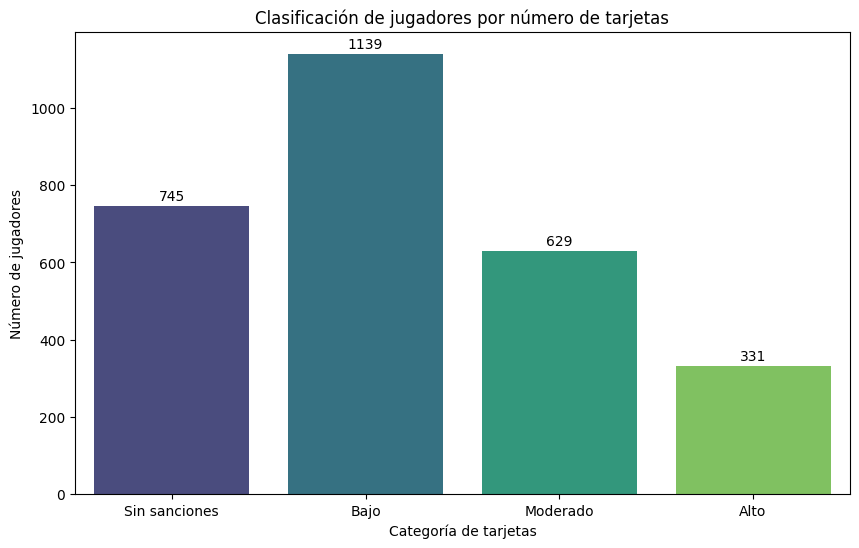

In [62]:
# PREGUNTA 5: Creación de nuevas características para categorizar el rendimiento
# Clasificación de jugadores según goles
df['Goal_Class'] = pd.cut(df['Performance_Gls'], bins=[-1, 0, 5, 10, 20, df['Performance_Gls'].max()],
                          labels=['Sin goles', 'Bajo', 'Moderado', 'Alto', 'Muy alto'])



# Gráfico de barras para la cantidad de jugadores en cada categoría de goles
plt.figure(figsize=(10, 6))
#sns.countplot(data=df, x='Goal_Class', palette="viridis")
sns.countplot(data=df, x='Goal_Class', hue='Goal_Class', palette="viridis", legend=False)
plt.title("Clasificación de jugadores por número de goles")
plt.xlabel("Categoría de goles")
plt.ylabel("Número de jugadores")
plt.subplots_adjust(hspace=0.3, wspace=0.2)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 25  # Ajusta el valor 0.2 según sea necesario
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')
plt.show()

# Clasificación de jugadores según asistencias
df['Assist_Class'] = pd.cut(df['Performance_Ast'], bins=[-1, 0, 5, 10, df['Performance_Ast'].max()],
                            labels=['Sin asistencias', 'Bajo', 'Moderado', 'Alto'])

# Gráfico de barras para la cantidad de jugadores en cada categoría de asistencias
plt.figure(figsize=(10, 6))
#sns.countplot(data=df, x='Assist_Class', palette="Blues")
sns.countplot(data=df, x='Assist_Class', hue='Assist_Class', palette="viridis", legend=False)
plt.title("Clasificación de jugadores por número de asistencias")
plt.xlabel("Categoría de asistencias")
plt.ylabel("Número de jugadores")
plt.subplots_adjust(hspace=0.5)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 25  # Ajusta el valor 0.2 según sea necesario
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')
plt.show()
plt.show()

# Clasificación de jugadores según tarjetas
df['Card_Class'] = pd.cut(df['Total_Cards'], bins=[-1, 0, 3, 6, df['Total_Cards'].max()],
                          labels=['Sin sanciones', 'Bajo', 'Moderado', 'Alto'])

# Gráfico de barras para la cantidad de jugadores en cada categoría de tarjetas
plt.figure(figsize=(10, 6))
#sns.countplot(data=df, x='Card_Class', palette="Reds")
sns.countplot(data=df, x='Card_Class', hue='Card_Class', palette="viridis", legend=False)
plt.title("Clasificación de jugadores por número de tarjetas")
plt.xlabel("Categoría de tarjetas")
plt.ylabel("Número de jugadores")
plt.subplots_adjust(hspace=0.5)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 25  # Ajusta el valor 0.2 según sea necesario
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')
plt.show()
plt.show()


# 3. ¡Vamos con el ML... ¿Qué? ¿Hay que preparar los datos primero?

⁉️ **Consideración:** En las siguientes preguntas harás clusterización y aprendizaje de máquina... prepara tus datos pensando en los modelos que utilizarás. Acá se toman los datos limpios y se pasan a numérico, se cambian las escalas, se agregan columnas para mejorar los resultados de los modelos, etc. Justifica todas tus decisiones.

ℹ️ **HINT:** ¿*Encoding*? ¿Normalización? ¿*Feature Engineering*?

---

✅ **Explicación:**

[ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

# 4. ¡Grupos everywhere!

⁉️ **Consideración:** Utiliza técnicas de clusterización para encontrar grupos dentro de tus datos. Recuerda colorear tus gráficos correctamente para que podamos ver los grupos. Sí, debes de graficar tus resultados. ¿En 2D, 3D, 4D? Queda a tu decisión. Recuerda que solo puedes usar métodos de clusterización de `sklearn`.

ℹ️ **HINT 1:** No olvides que cada método es diferente. ¿Justificarás por qué elegiste ese método?

ℹ️ **HINT 2:** No olvides explicar cómo eliges tus hiperparámetros.

ℹ️ **HINT 3:** ¿No encuentras grupos? ¿Sabías que PCA y otras técnicas de reducción de dimensionalidad son útiles para *clustering*?

---

✅ **Explicación:**

[ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# BONUS: +0.5 puntos.
# Si no harás el bonus, elimina esta sección.

# [ AGREGA AQUÍ TU CÓDIGO ]

# 5. ¿Podemos predecir algo con estos datos? Demostremos nuestra experiencia.

⁉️ **Consideración:** Es la hora de aplicar modelos de clasificación o regresión (`sklearn`) a los datos. Enfócate en ser ordenado y seguir todos los pasos: datos, entrenamiento, validación, testeo, interpretación, etc. Debes de explicar a fondo tus decisiones de modelo, parámetros, interpretación de resultados, medidas de rendimiento, etc.

ℹ️ **HINT 1:** ¿Habías escuchado de Validación Cruzada? ¿Has escuchado de `GridSearchCV`?

ℹ️ **HINT 2:** ¿Te fjaste en el *overfitting*?

ℹ️ **HINT 3:** ¿Por qué elegiste ese modelo? Puedes utilizar cualquier modelo de `sklearn`.

ℹ️ **HINT 4:** Se recomienda que comparen varios modelos. ¿Leíste la documentación de `sklearn`?

---

✅ **Explicación:**

[ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

# 6. ¿Puedes explicar mejor tus resultados? ¡De Junior a Senior!

⁉️ **Consideración:** Para pasar de ser una *Data Scientist Junior* a *Senior* deberás ser muy bueno para interpretar y mejorar los resultados de tu modelo. ¿Qué otras mediciones puedes utilizar? ¿Cómo puedes modificar tus datos? ¿Qué datos te faltan? ¿Qué impacta más a tu predicción? ¿Por qué hay métricas más importantes que otras? ¡Y muchas preguntas más! Ahonda en los resultados de tus modelos.

ℹ️ **HINT 1:** ¿Qué otras métricas existen? ¿Matrices de confusión? ¿Por qué hay clases que funcionan peor?

ℹ️ **HINT 2:** ¿Consideraste la reducción de dimensionalidad?

ℹ️ **HINT 3:** ¿Conoces la librería `SHAP`? ¿O los *Partial Dependece Plots*?

---

✅ **Explicación:**

[ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

In [ ]:
# [ AGREGA AQUÍ TU CÓDIGO ] ¿Necesitas más celdas? ¡Adelante!

> # ¡NO OLVIDES GUARDAR Y SUBIR EL NOTEBOOK A LA PLATAFORMA CUANDO TERMINES! FORMATO .ipynb

> # ¡NO OLVIDES SUBIR LOS DATOS ORIGINALES A LA PLATAFORMA!